In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<hr color=darkblue>

<strong><font color=darkblue size=6>Task 1: Theory</font></strong>

## **Task 1.1**

Consider $K$ classes of normally distributed real-valued random variables with shared standard deviation, $\sigma$, but class-specific means, $\mu_k$. Show that if class $k$ maximizes the discriminant function, $\delta_k$, it then also maximizes the posterior for class $k$, i.e. $p_k$ defined in ISLR4.4.1. Rigorously justify each transition. FYI: this is a one-directional claim (mostly algebraic manipulations). *Hint*: carefully review section ISLR4.4 and the relation between the posterior and the corresponding discriminant function. Start by formulaically defining all components, including the posterior and discriminant function.


## **SOLUTION**

We are given $K$ classes of Gaussian random variables, so that for the $k^{th}$ class: $X_{i,k}\sim\mathcal{N}(\mu_k, \sigma_k^2)$, so that $\mu_k$ is class-specific, but $\forall i, j:\sigma_i = \sigma_j$.

From ISLR book we know that the discriminant function for an abservation instance $x$ of the $X$ RV has the follwing look ($\pi_k$ indicates the prior probability for $x$ to belong to $k^{th}$ class):
$$
\delta_k(x)=x\frac{\mu_k}{\sigma^2}-\frac{\mu_k^2}{2\sigma^2}+\log{\pi_k}.\tag{1}
$$
Whilst the posterior probability of $x$ has the follwing definition:
$$
p_k(x) = \frac{\pi_k\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{1}{2\sigma^2}(x-\mu_k)^2\right)}{\sum_{l=1}^{K}\pi_l\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{1}{2\sigma^2}(x-\mu_l)^2\right)}\tag{2}
$$

From ISLR, we know, that an observation $X=x$ is assigned to the very class, for which $p_k(x)$ is largest, same applies, once $\delta_k(x)$ is largest for given observation instance $x$. We now have to show such a relation explicitly, so that if some $\tilde k$ maximizes $\delta(x)$, then $p(x)$ is maximized as well. Let us rewrite $(1)$ as follows:

$$
\delta_k(x)=x\frac{\mu_k}{\sigma^2}-\frac{\mu_k^2}{2\sigma^2}+\log{\pi_k} = \frac{\mu_k(2x-\mu_k)}{2\sigma^2} + \log{\pi_k} = \frac{-(x-\mu_k)^2 + x^2}{2\sigma^2} + \log\pi_k = (\text{by properties of log})=\\=\log\left(\frac{1}{\sqrt{2\pi}\sigma}\exp\left(\frac{-(x-\mu_k)^2}{2\sigma^2}\right)\right) + \log\exp\left(\frac{x^2}{2\sigma^2}\right) - \log\left(\frac{1}{\sqrt{2\pi}\sigma}\right) + \log\pi_k = \log\left(\frac{\pi_k\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{1}{2\sigma^2}(x-\mu_k)^2\right)}{\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{x^2}{2\sigma^2}\right)}\right).
$$

Here we can see that $\exp\delta_k(x) = \frac{\pi_k\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{1}{2\sigma^2}(x-\mu_k)^2\right)}{\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{x^2}{2\sigma^2}\right)}$, and now: $\underset{k}{\text{argmax}~}\delta_k(x) =\tilde{k} \Rightarrow \underset{k}{\text{argmax}~}\exp\delta_k(x)=\tilde{k}$, for which the numerator will be maximized, in order to obtain the largest-possible fraction, so that by maximizing $\exp\delta_k(x)$ over $k$, we are actually maximizing the numerator of $\exp{\delta_k(x)}$ (as denominator does not depend on $k$, and we cannot minimize it), hence $\underset{k}{\text{argmax}~}\delta_k(x) =\tilde{k} \Rightarrow \underset{k}{\text{argmax}~}\exp\delta_k(x)=\tilde{k} \Rightarrow \underset{k}{\text{argmax}~}N(x, \pi_k, \mu_k, \sigma) = \tilde k$, where: $$N(x, \pi_k, \mu_k, \sigma) = \pi_k\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{1}{2\sigma^2}(x-\mu_k)^2\right).$$

Now, let us note, that numerator of $p_k(x)$ is in fact $N(x,\pi_k, \mu_k,\sigma)$, and hence as by maximizing $N(x,\pi_k, \mu_k,\sigma)$, we are maximizing the numerator of $\pi_k(x)$, what automatically implies maximizing the whole $\pi_k(x)$ over $k$ itself, of course $N(x,\pi_k, \mu_k,\sigma)$ is also included in the denominator, but we are still looking for the best $k$ to maximize the numerator, as far as denominator actually accounts for all possible classes $l \in [K]$ so that it can be ignored in maximization problem of $p_k(x)$, since it (denominator) is going to stay fixed for any chosen $k$. So that we finally obtain the following maximization sequence: $$\underset{k}{\text{argmax}~}\delta_k(x) =\tilde{k} \Rightarrow \underset{k}{\text{argmax}~}\exp\delta_k(x)=\tilde{k} \Rightarrow \underset{k}{\text{argmax}~}N(x, \pi_k, \mu_k, \sigma)~[\text{numerator of }p_k(x)]= \tilde k \Rightarrow\underset{k}{\text{argmax}~}p_k(x)=\tilde k.~\blacksquare$$

## **Task 1.2**

Given  [iid](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables) random variables $X_1,...,X_n$, each of the form $X\sim\text{Gamma}(2, \theta)$ with [PDF](https://en.wikipedia.org/wiki/Probability_density_function):

$$f\left(X \mid \theta\right)=\theta^{2} \cdot X \cdot e ^{-X \theta}, $$

where $ \quad X>0 , \quad \theta>0, \quad \mathbb E\left(X\right)= \frac{2}{\theta}$

**(a)** Assign the $\text{Gamma}(\alpha, \beta)$ prior to $\theta$ and derive an expression of the corresponding [posterior PDF](https://en.wikipedia.org/wiki/Posterior_probability).

**(b)** Find a [Bayes estimator](https://en.wikipedia.org/wiki/Bayes_estimator) for $\theta$ based on the posterior in part (a).

**(c)** Discuss how you can calculate a 95% [credible interval](https://en.wikipedia.org/wiki/Credible_interval). You do not need to calculate it. Provide the interpretation of such an interval. 

**(d)** Assume that $n = 5$ and $\sum_{i=1}^{n} X_{i}=29.6$. Find the [Bayes factor](https://en.wikipedia.org/wiki/Bayes_factor) for the hypotheses $H_0: \theta = 0.5$ and $H_1: \theta = 1$ and provide an interpretation of it. Note that you can answer in terms of logarithms or exponentials and there is no need to give the final number.

**Remark**: you can refresh Bayesian statistics by reviewing [*Computer Age Statistical Inference, Ch.3, p.22*](https://web.stanford.edu/~hastie/CASI_files/PDF/casi.pdf#page=40) or [Stanford's STAT200 Lecture Notes](https://web.stanford.edu/class/stats200/Lecture20.pdf). Recommended videos: [🎦](https://www.youtube.com/results?search_query=bayesian+inference), [&#127910;](https://www.youtube.com/results?search_query=Bayes+estimator), [&#127910;](https://www.youtube.com/results?search_query=credible+interval), [&#127910;](https://www.youtube.com/results?search_query=Bayes+factor)

## **SOLUTION**
**(a)** The posterior PDF for $(\theta, x)$ has the follwing form: $p(\theta|x)\propto p(x|\theta)p(\theta)$, where $p(\theta)$ is a prior PDF, and $p(x|\theta)$ is the Likelihood function of $x$.

Now, according to the definition of the Likelihood function:
$$
p(x|\theta) = \prod^n_{i=1} f(X_i|\theta) = \prod^n_{i=1}\theta^2\cdot X_i \cdot e^{-X_i \theta} = \theta^{2n} \cdot \exp\left(-\theta\sum\limits^n_{i=1}X_i \right) \cdot \prod^n_{i=1}X_i.
$$
Now, we obtain:
$$p(\theta|x)\propto p(x|\theta)p(\theta)~ \underset{\text{Gamma}(\alpha, \beta)}{\propto}~ p(x|\theta)\cdot \theta^{\alpha-1}e^{-\beta\theta} \propto \theta^{2n}e^{-\theta\sum\limits^n_{i=1}X_i}\theta^{\alpha-1}e^{-\beta\theta} = \theta^{2n+\alpha-1}e^{-\theta(\beta + \sum\limits^n_{i=1}X_i)}~\text{what yields }p(\theta|x) \text{ to follow the distribution of: Gamma}(2n+\alpha, \beta+\sum\limits^n_{i=1}X_i).$$

**(b)** The Bayes estimator for $(x, \theta)$, according to the posterior distribution, would be:
$$
\mathbb{E}[\theta|X] = \frac{2n+\alpha}{\beta+\sum\limits^n_{i=1}X_i}.
$$

**(c)** The $0.95$ credible interval ($\alpha = 0.05$) is formed by the interval from the $\frac{\alpha}{2}$ to $1- \frac{\alpha}{2}$ respective quartiles from the posterior distribution of $\text{Gamma}(2n+\alpha, \beta+\sum\limits^n_{i=1}X_i)$.

**(d)** According to the given conditions, we can compute the Bayes factor to be:
$$
B(\theta)_{H_{0,1}} = \frac{\text{Ga}(10 + \alpha, \beta + 29.9)[\theta=0.5]/\text{Ga}(\alpha, \beta)[\theta=0.5]}{\text{Ga}(10 + \alpha, \beta + 29.9)[\theta=1]/\text{Ga}(\alpha, \beta)[\theta=1]}.
$$

<hr color=darkblue>

<strong><font color=darkblue size=6>Task 2: Kaggle-HAR </font></strong>



**Private URL** for students (allows submission) is in Moodle's HW assignment. **Public URL** with read-only access is [here](https://www.kaggle.com/c/hse-ml-hw11-nov-22-har/rules). See competition rules, submission, grading, dataset, and performance metric. The **starter code** below produces a baseline model, which you should beat, while respecting the competition rules. Your code starts after the timer. This is your baseline model. Remember to seed [RNG](https://en.wikipedia.org/wiki/Random_number_generation) in all experiments for reproducibility.

**Instructions for enabling Kaggle API in Colab**:
1. Accept competition rules before running [Kaggle API](https://github.com/Kaggle/kaggle-api#api-credentials). [Loading Kaggle dataset example](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab)
1. In your Kaggle Account, [Create API Token](https://github.com/Kaggle/kaggle-api#api-credentials) and save the resulting **kaggle.json** file to the [root of your Google Drive](https://drive.google.com/drive/u/0/my-drive) 
2. In Colab, open **Files** panel 🗀 (on the left) and click gray folder icon <font color=gray>🖿</font> to mount your Google drive

Your Kaggle/Google Drive credentials are secure; and Colab's kaggle.json only lasts a Colab session.

In [2]:
!pip -q install --upgrade --force-reinstall --no-deps kaggle > log  # upgrade kaggle package (to avoid a warning)
!mkdir -p ~/.kaggle                                           # .kaggle folder must contain kaggle.json for kaggle executable to properly authenticate you to Kaggle.com
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json >log  # First, download kaggle.json from kaggle.com (in Account page) and place it in the root of mounted Google Drive
!cp kaggle.json ~/.kaggle/kaggle.json > log                   # Alternative location of kaggle.json (without a connection to Google Drive)
!chmod 600 ~/.kaggle/kaggle.json                              # give only the owner full read/write access to kaggle.json
!kaggle config set -n competition -v hse-ml-hw11-nov-22-har   # set the competition context for the next few kaggle API calls. !kaggle config view - shows current settings
!kaggle competitions download >> log                          # download competition dataset as a zip file
!unzip -o *.zip >> log                                        # Kaggle dataset is copied as a single file and needs to be unzipped.

cp: cannot stat 'kaggle.json': No such file or directory
- competition is now set to: hse-ml-hw11-nov-22-har
100% 601M/601M [00:06<00:00, 94.8MB/s]
Using competition: hse-ml-hw11-nov-22-har
 teamId  teamName                                            submissionDate       score    
-------  --------------------------------------------------  -------------------  -------  
7807185  Jingtao Xu                                          2021-12-05 19:34:59  0.96877  
7806289  IB-My Little Pony-Adshead,Ivanushkina,Odnakov       2021-12-01 21:15:22  0.96673  
7816033  DJ-Fancy Kaggle group name-Vasyutin,Kolobaev,Veips  2021-12-05 18:57:11  0.96469  
7822077  Arina Fayzulina                                     2021-12-05 18:12:07  0.96469  
7834510  KagDm                                               2021-12-05 12:27:31  0.96401  
7822288  Kseniya Yakunina                                    2021-12-04 19:25:21  0.96266  
7815606  IA-Red Eagles-Argunov,Lukianov,Miniakhmetov         2021-12-04 20

In [3]:
%%time
%%capture
%reset -f
!pip -q install -U plotly > log
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all" 
import numpy as np, pandas as pd, time, matplotlib.pyplot as plt, os, plotly.express as px
import tensorflow as tf, tensorflow.keras as keras
from sklearn.neural_network import MLPClassifier   # SKLearn's MLP is optimised for CPU (and doesn't use GPU)
from keras.layers import Flatten, Dense
from sklearn.model_selection import train_test_split
np.set_printoptions(linewidth=10000, precision=2, edgeitems=20, suppress=True)
pd.set_option('max_colwidth', 1000, 'max_columns', 100, 'display.width', 1000, 'max_rows', 4)
ToCSV = lambda df, fname: df.round(2).to_csv(f'{fname}.csv', index_label='id') # rounds values to 2 decimals

class Timer():
  def __init__(self, lim:'RunTimeLimit'=60): self.t0, self.lim, _ = time.time(), lim, print(f'⏳ started. You have {lim} sec. Good luck!')
  def ShowTime(self):
    msg = f'Runtime is {time.time()-self.t0:.0f} sec'
    print(f'\033[91m\033[1m' + msg + f' > {self.lim} sec limit!!!\033[0m' if (time.time()-self.t0-1) > self.lim else msg)

CPU times: user 2.81 s, sys: 402 ms, total: 3.21 s
Wall time: 21.9 s


In [4]:
%time vX  = pd.read_csv('testX.csv', index_col='id')  # load testing input features X (only)
%time tYX = pd.read_csv('trainYX.csv')                # partially load training labels Y and input features X
tYX  # 561 input features

CPU times: user 276 ms, sys: 37.7 ms, total: 313 ms
Wall time: 319 ms
CPU times: user 41.4 s, sys: 7.45 s, total: 48.9 s
Wall time: 48.8 s


,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560
0,5,0.2778,0.0092,-0.0676,-0.9785,-0.9160,-0.9610,-0.9834,-0.9170,-0.9590,-0.9390,-0.4230,-0.7520,0.8496,0.6226,0.8400,-0.9434,-0.9614,-1.0370,-1.0150,-1.0070,-0.9640,-0.9550,-0.6772,0.0568,0.0192,0.5900,-0.3162,0.1833,0.4440,-0.2622,0.1092,0.4468,-0.4443,-0.1484,0.1718,-0.2727,0.0954,-0.4720,-0.5264,0.2332,0.9640,-0.1309,0.1071,-0.9814,-0.948,-0.9727,-0.9720,-0.9575,-0.9585,...,-0.9126,-0.2037,-0.5300,-0.8164,-0.9170,-0.8850,-0.9033,-0.9120,-0.9750,-0.9326,-1.014,-0.9560,-0.6780,-0.9966,-0.6180,-0.1021,-0.5977,-0.9546,-0.9110,-0.9260,-0.9297,-1.017,-0.9460,-1.022,-0.9570,-0.2930,-1.0100,-0.3455,-0.1411,-0.5215,-0.9585,-0.9160,-0.9434,-0.9414,-0.9750,-0.9414,-0.9890,-0.9610,-0.4453,-1.002,-0.5415,-0.0308,-0.5093,0.0380,-0.0912,-0.1415,-0.1316,-0.8200,0.1721,-0.0535
1,1,0.2454,0.0073,-0.1046,-0.2010,0.1426,-0.2668,-0.2776,0.0648,-0.2605,-0.0572,-0.0364,-0.2830,-0.2830,-0.1448,0.4443,-0.0844,-0.6733,-0.7603,-0.7847,-0.4136,-0.3633,-0.1837,0.2830,0.5100,0.0582,-0.2502,0.3079,-0.1384,0.0822,0.0902,-0.0034,0.1969,0.0538,0.2996,-0.0258,0.0936,-0.3472,-0.1434,-0.4058,0.3690,0.9326,-0.2942,-0.0916,-0.9966,-0.964,-0.9663,-0.9746,-0.9736,-0.9634,...,-0.8115,0.4165,-0.4731,-0.8210,0.2542,0.2410,0.2688,0.0928,-0.7710,0.2430,-0.221,-0.1018,0.7134,-0.8994,-0.0642,-0.0842,-0.4750,-0.1345,-0.3853,-0.2573,-0.5430,-0.757,-0.1365,-0.677,-0.1826,0.6777,-0.7866,0.3240,-0.6206,-0.8530,-0.2500,-0.3025,-0.3176,-0.3198,-0.6426,-0.2488,-0.7236,-0.2512,0.6177,-0.910,0.1069,-0.0397,-0.4220,0.5480,0.6455,0.2296,-0.0335,-0.7000,0.2998,0.0880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499998,4,0.2740,-0.0132,-0.1257,-0.9834,-1.0020,-0.9590,-0.9897,-0.9746,-0.9873,-0.9346,-0.5630,-0.8394,0.8306,0.6846,0.8350,-0.9840,-0.9824,-0.9960,-1.0200,-0.9950,-1.0160,-0.9590,-0.6500,-0.5225,-0.7974,0.5020,-0.2532,0.3723,0.1772,0.2920,-0.2756,0.3179,-0.1398,0.0948,0.0180,-0.1853,0.1871,0.0790,-0.0402,-0.0880,0.9785,-0.0442,-0.0532,-0.9950,-1.028,-0.9790,-1.0010,-0.9697,-1.0060,...,-0.2356,0.4312,-0.6030,-0.8706,-0.9700,-0.9863,-1.0010,-0.9990,-0.9927,-0.9910,-1.020,-1.0210,-0.9920,-0.9736,0.3857,-0.4620,-0.7485,-0.9985,-0.9575,-0.9897,-0.9814,-1.000,-0.9990,-1.008,-0.9660,-0.8574,-0.9210,0.1049,-0.6284,-0.8970,-1.0200,-1.0150,-0.9750,-1.0170,-0.9746,-0.9937,-0.9927,-0.9950,-1.0030,-0.844,0.2454,-0.3782,-0.7183,-0.0227,0.1957,0.1864,0.4556,-0.9326,0.1137,0.0595
499999,5,0.2695,-0.0251,-0.1010,-1.0170,-0.9050,-0.9375,-0.9736,-0.8920,-0.9673,-0.9575,-0.5293,-0.8022,0.8530,0.6714,0.8480,-0.9624,-1.0205,-0.9900,-0.9600,-0.9960,-0.9480,-0.9720,-0.7320,-0.5117,-0.3535,0.3710,-0.2270,0.2700,-0.0636,-0.2438,0.0608,0.2050,-0.0218,-0.1199,0.0678,0.0154,-0.1132,-0.2886,-0.3882,0.6284,0.9966,-0.1277,0.0722,-1.0050,-0.925,-0.9440,-1.0050,-0.9824,-0.9233,...,-0.9500,0.0488,-0.3591,-0.7050,-1.0240,-0.9790,-0.9746,-0.9814,-0.9920,-0.9814,-1.013,-0.9860,-0.9650,-1.0150,-0.1430,-0.1555,-0.5180,-0.9320,-0.9200,-0.9424,-0.9326,-0.932,-0.9170,-0.985,-0.9463,-0.4020,-0.9640,-0.3160,-0.0948,-0.4695,-0.9590,-0.9500,-0.9976,-0.9680,-1.0340,-0.9727,-0.9900,-0.9790,-0.6980,-1.017,-0.4863,0.0084,-0.3293,-0.0127,-0.1399,0.4624,-0.7610,-0.8696,0.1720,-0.0272


In [5]:
tYX.y.value_counts(sort=False).to_frame().T  # counts of observations in each label category

,1,2,3,4,5,6
y,83502,72554,66901,87427,93667,95949


In [6]:
tmr = Timer() # runtime limit (in seconds). Add all of your code after the timer

⏳ started. You have 60 sec. Good luck!


<font size=5>⏳</font> <strong><font color=orange size=5>Your Code, Documentation, Ideas and Timer Start Here...</font></strong>


**TODO. Explain your preprocessing:** i.e. feature engineering, subsampling, clustering, dimensionality reduction, etc.

In [7]:
tX, tY = tYX.drop('y', axis=1).head(50000), tYX.head(50000).y-1               # shift labels by -1 to range {0,1,2,3,4,5}

**TODO. Explain your modeling approach:** ideas you tried and why you thought they would be helpful. Takeaway: how these decisions guided you in modeling.

In [8]:
tf.random.set_seed(0)   # always seed your experiments
Init = keras.initializers.RandomNormal(seed=0) # seed weights and biases

m = keras.models.Sequential([
    Dense(10, kernel_initializer=Init, input_shape=[tX.shape[1]]), # hidden layer with 100 neurons requires 561x100 trainable weights + 100 biases
    Dense(6,  kernel_initializer=Init, activation='softmax')])     # one output neuron for each label. Softmax for multiclass (single label)
m.summary()
loss = tf.keras.losses.SparseCategoricalCrossentropy()              # Maps 0-based integer labels to one-hot encodings
m.compile(loss=loss, optimizer="sgd", metrics=["accuracy"])         # Accuracy is not really needed since it's equivalent to loss

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                5620      
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
Total params: 5,686
Trainable params: 5,686
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = m.fit(tX, tY, epochs=3, validation_split=.3)  # validation loss is decreasing (as it should)

Epoch 1/3
1094/1094 [==============================] - 3s 2ms/step - loss: 0.8193 - accuracy: 0.6982 - val_loss: 0.4222 - val_accuracy: 0.8655
Epoch 2/3
1094/1094 [==============================] - 2s 2ms/step - loss: 0.3162 - accuracy: 0.8944 - val_loss: 0.2434 - val_accuracy: 0.9184
Epoch 3/3
1094/1094 [==============================] - 2s 2ms/step - loss: 0.2059 - accuracy: 0.9285 - val_loss: 0.1732 - val_accuracy: 0.9363


In [10]:
print('History object contains: ' + ', '.join(hist.history.keys()))
dfHist = pd.DataFrame(hist.history)
dfHist['epoch'] = dfHist.index+1
f = px.line(dfHist, x='epoch', y='val_loss', title='', markers=True);
f = f.update_layout(height=200, margin=dict(l=0, r=0, t=0, b=0))
f = f.show();

History object contains: loss, accuracy, val_loss, val_accuracy


In [11]:
pOneHot = m.predict(vX)   # probabilities for each category. Subjects are rows
YLab = [f'{i}/{s}' for i, s in enumerate('walking walking_upstairs walking_downstairs sitting standing laying'.split())]  # column labels
pd.DataFrame(pOneHot[:3,:], columns=YLab).style.background_gradient(cmap='coolwarm', axis=1)  # display first few predictions

,0/walking,1/walking_upstairs,2/walking_downstairs,3/sitting,4/standing,5/laying
0,0.969090,0.014947,0.014097,0.000201,0.001664,0.000002
1,0.000000,0.000000,0.000000,0.004081,0.000001,0.995918
2,0.000000,0.000000,0.000000,0.030873,0.000001,0.969126


In [12]:
pY = pd.DataFrame(np.argmax(pOneHot, axis = 1)+1, columns=['y'])  # predicted labels (from 1 to 6)
pY.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,2897,2898,2899,2900,2901,2902,2903,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913,2914,2915,2916,2917,2918,2919,2920,2921,2922,2923,2924,2925,2926,2927,2928,2929,2930,2931,2932,2933,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943,2944,2945,2946
y,1,6,6,2,1,6,2,6,1,5,6,3,6,5,1,5,3,2,2,2,2,3,4,2,5,1,4,5,5,5,3,3,2,3,3,2,5,5,6,5,3,5,6,6,6,2,2,1,6,3,...,2,5,4,5,2,3,2,6,1,5,1,5,2,1,4,4,2,2,1,3,1,5,5,2,6,3,6,6,6,3,6,5,3,5,1,4,1,3,6,6,2,1,3,3,4,5,6,3,4,2


In [13]:
ToCSV(pY, 'HAR_baseline')  # generate a CSV submission file for Kaggle

<font size=5>⏳</font> <strong><font color=orange size=5>Do not exceed competition's runtime limit!</font></strong>


In [14]:
tmr.ShowTime()    # measure Colab's runtime. Do not remove. Keep as the last cell in your notebook.

Runtime is 10 sec


# 💡**Starter Ideas**

1. Try tuning DNN hyperparameters
1. Training set has 500K observations (2GB), but you really don't need them all. They are all bootstrapped (with noise) from the original sample of 7352 observations. In order to stay within Colab runtime limit (CRTL), you can 
  1. use more observations for a shallow DNN, but risk underfitting due to lower model complexity
  1. use fewer observations for a deeper DNN, but risk overfitting to higher model complexity
1. Check out the original related papers about feature engineering for this dataset
1. Try engineering features with [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) and discarding unimportant features via PCA or alternative technique.
1. Consider KMeans/KMedoid or other clustering methods to identify observations, which represent the original 7352 observations. It might require finding 7352 cluster centroids/medoids.
  1. Fast clustering methods: [FAISS](https://github.com/facebookresearch/faiss) (GPU-enabled)
1. For deep NN, consider dropout, batch normalization
1. Try PCA on transposed matrix to find/eliminate highly correlated observations
1. Try [stratified sampling](https://en.wikipedia.org/wiki/Stratified_sampling) to ensure each label is proportionally represented in a subsample

In [47]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [49]:
tYX.shape

(500000, 562)

In [50]:
vX.shape

(2947, 561)

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import tensorflow as tf

In [20]:
#tf.random.set_seed(0)

In [52]:
train_df = tYX
test_df = vX


In [53]:
train_df

,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560
0,5,0.2778,0.0092,-0.0676,-0.9785,-0.9160,-0.9610,-0.9834,-0.9170,-0.9590,-0.9390,-0.4230,-0.7520,0.8496,0.6226,0.8400,-0.9434,-0.9614,-1.0370,-1.0150,-1.0070,-0.9640,-0.9550,-0.6772,0.0568,0.0192,0.5900,-0.3162,0.1833,0.4440,-0.2622,0.1092,0.4468,-0.4443,-0.1484,0.1718,-0.2727,0.0954,-0.4720,-0.5264,0.2332,0.9640,-0.1309,0.1071,-0.9814,-0.948,-0.9727,-0.9720,-0.9575,-0.9585,...,-0.9126,-0.2037,-0.5300,-0.8164,-0.9170,-0.8850,-0.9033,-0.9120,-0.9750,-0.9326,-1.014,-0.9560,-0.6780,-0.9966,-0.6180,-0.1021,-0.5977,-0.9546,-0.9110,-0.9260,-0.9297,-1.017,-0.9460,-1.022,-0.9570,-0.2930,-1.0100,-0.3455,-0.1411,-0.5215,-0.9585,-0.9160,-0.9434,-0.9414,-0.9750,-0.9414,-0.9890,-0.9610,-0.4453,-1.002,-0.5415,-0.0308,-0.5093,0.0380,-0.0912,-0.1415,-0.1316,-0.8200,0.1721,-0.0535
1,1,0.2454,0.0073,-0.1046,-0.2010,0.1426,-0.2668,-0.2776,0.0648,-0.2605,-0.0572,-0.0364,-0.2830,-0.2830,-0.1448,0.4443,-0.0844,-0.6733,-0.7603,-0.7847,-0.4136,-0.3633,-0.1837,0.2830,0.5100,0.0582,-0.2502,0.3079,-0.1384,0.0822,0.0902,-0.0034,0.1969,0.0538,0.2996,-0.0258,0.0936,-0.3472,-0.1434,-0.4058,0.3690,0.9326,-0.2942,-0.0916,-0.9966,-0.964,-0.9663,-0.9746,-0.9736,-0.9634,...,-0.8115,0.4165,-0.4731,-0.8210,0.2542,0.2410,0.2688,0.0928,-0.7710,0.2430,-0.221,-0.1018,0.7134,-0.8994,-0.0642,-0.0842,-0.4750,-0.1345,-0.3853,-0.2573,-0.5430,-0.757,-0.1365,-0.677,-0.1826,0.6777,-0.7866,0.3240,-0.6206,-0.8530,-0.2500,-0.3025,-0.3176,-0.3198,-0.6426,-0.2488,-0.7236,-0.2512,0.6177,-0.910,0.1069,-0.0397,-0.4220,0.5480,0.6455,0.2296,-0.0335,-0.7000,0.2998,0.0880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499998,4,0.2740,-0.0132,-0.1257,-0.9834,-1.0020,-0.9590,-0.9897,-0.9746,-0.9873,-0.9346,-0.5630,-0.8394,0.8306,0.6846,0.8350,-0.9840,-0.9824,-0.9960,-1.0200,-0.9950,-1.0160,-0.9590,-0.6500,-0.5225,-0.7974,0.5020,-0.2532,0.3723,0.1772,0.2920,-0.2756,0.3179,-0.1398,0.0948,0.0180,-0.1853,0.1871,0.0790,-0.0402,-0.0880,0.9785,-0.0442,-0.0532,-0.9950,-1.028,-0.9790,-1.0010,-0.9697,-1.0060,...,-0.2356,0.4312,-0.6030,-0.8706,-0.9700,-0.9863,-1.0010,-0.9990,-0.9927,-0.9910,-1.020,-1.0210,-0.9920,-0.9736,0.3857,-0.4620,-0.7485,-0.9985,-0.9575,-0.9897,-0.9814,-1.000,-0.9990,-1.008,-0.9660,-0.8574,-0.9210,0.1049,-0.6284,-0.8970,-1.0200,-1.0150,-0.9750,-1.0170,-0.9746,-0.9937,-0.9927,-0.9950,-1.0030,-0.844,0.2454,-0.3782,-0.7183,-0.0227,0.1957,0.1864,0.4556,-0.9326,0.1137,0.0595
499999,5,0.2695,-0.0251,-0.1010,-1.0170,-0.9050,-0.9375,-0.9736,-0.8920,-0.9673,-0.9575,-0.5293,-0.8022,0.8530,0.6714,0.8480,-0.9624,-1.0205,-0.9900,-0.9600,-0.9960,-0.9480,-0.9720,-0.7320,-0.5117,-0.3535,0.3710,-0.2270,0.2700,-0.0636,-0.2438,0.0608,0.2050,-0.0218,-0.1199,0.0678,0.0154,-0.1132,-0.2886,-0.3882,0.6284,0.9966,-0.1277,0.0722,-1.0050,-0.925,-0.9440,-1.0050,-0.9824,-0.9233,...,-0.9500,0.0488,-0.3591,-0.7050,-1.0240,-0.9790,-0.9746,-0.9814,-0.9920,-0.9814,-1.013,-0.9860,-0.9650,-1.0150,-0.1430,-0.1555,-0.5180,-0.9320,-0.9200,-0.9424,-0.9326,-0.932,-0.9170,-0.985,-0.9463,-0.4020,-0.9640,-0.3160,-0.0948,-0.4695,-0.9590,-0.9500,-0.9976,-0.9680,-1.0340,-0.9727,-0.9900,-0.9790,-0.6980,-1.017,-0.4863,0.0084,-0.3293,-0.0127,-0.1399,0.4624,-0.7610,-0.8696,0.1720,-0.0272


In [54]:
test_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.3142,-0.0251,-0.1250,-0.4185,-0.1707,-0.4265,-0.4497,-0.1836,-0.4100,-0.1537,-0.1823,-0.3806,0.3716,0.0620,0.5757,-0.3030,-0.8370,-0.8640,-0.8535,-0.5205,-0.3486,-0.3962,0.3965,0.3147,0.0732,-0.3600,0.4092,-0.2252,0.0484,-0.0731,0.2054,-0.0099,-0.0017,-0.1094,0.1564,-0.0598,-0.0450,-0.3875,-0.0948,0.2620,0.9100,-0.3389,0.0237,-0.952,-0.9785,-0.970,-0.9175,-0.9910,-0.9575,0.8623,...,-0.7340,0.3370,-0.6990,-0.8880,-0.2041,-0.2680,-0.1696,-0.3704,-0.5435,-0.2032,-0.6910,-0.2400,0.3840,-0.8750,0.2517,-0.1758,-0.5566,-0.5117,-0.6360,-0.5130,-0.7744,-0.7880,-0.5244,-0.8810,-0.4631,0.4960,-0.3840,0.1997,-0.7500,-0.9570,-0.6440,-0.6006,-0.5713,-0.6700,-0.9610,-0.659,-0.9023,-0.5880,0.3484,-0.8745,0.0124,-0.2009,-0.6180,-0.5780,0.7380,-0.9350,-0.2076,-0.6700,0.3171,0.0052
1,0.2496,-0.0210,-0.0990,-0.9480,-0.9590,-0.9790,-0.9614,-0.9660,-0.9840,-0.9120,-0.5280,-0.8010,0.8066,0.6685,0.8306,-0.9500,-0.9873,-0.9985,-1.0110,-0.9410,-0.9727,-0.9727,-0.3086,-0.5776,-0.3179,-0.1814,0.0620,0.1808,-0.3193,0.0590,-0.0446,0.0230,0.4705,0.1150,-0.0302,0.1721,-0.1791,0.0714,-0.3232,-0.5470,-0.4750,0.6484,0.7666,-0.920,-0.9850,-0.980,-0.9160,-0.9920,-0.9785,-0.5090,...,-0.8620,-0.0361,-0.6943,-0.9287,-0.9790,-0.9660,-0.9640,-0.9824,-0.9663,-0.9697,-1.0050,-0.9663,-0.8945,-0.9920,0.3616,-0.2722,-0.6470,-0.9663,-0.9614,-0.9634,-0.9610,-0.9840,-0.9863,-0.9985,-0.9700,-0.4648,-0.9000,0.1111,-0.5547,-0.8370,-0.9897,-0.9688,-0.9700,-0.9720,-0.9624,-0.979,-1.0130,-0.9840,-0.6577,-1.0130,0.3090,-0.0421,-0.4000,-0.0448,0.1063,0.3752,0.2942,0.5903,-0.4210,-0.5990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,0.2766,-0.0196,-0.1057,-0.9863,-0.9927,-0.9814,-1.0100,-0.9873,-0.9873,-0.9400,-0.5780,-0.8240,0.8570,0.6865,0.8440,-0.9880,-0.9985,-1.0130,-1.0010,-0.9927,-0.9897,-0.9810,-0.5854,-0.7040,-0.5510,0.0740,-0.0154,0.0144,0.1282,0.0236,0.0232,0.1582,0.1470,0.1385,-0.0140,-0.0650,0.1234,-0.1458,-0.2747,-0.2598,0.8945,0.2632,0.1770,-0.992,-1.0140,-1.008,-0.9834,-0.9873,-0.9990,0.8200,...,-1.0120,0.2798,-0.6830,-0.9175,-0.9960,-0.9814,-1.0140,-1.0150,-1.0050,-0.9937,-0.9840,-0.9920,-0.9985,-0.8086,0.3782,-0.8200,-0.9834,-1.0020,-0.9966,-1.0050,-1.0020,-0.9946,-0.9927,-0.9960,-0.9990,-0.9233,-0.9873,0.2832,-0.5150,-0.7944,-0.9880,-0.9937,-0.9824,-0.9910,-0.9960,-0.999,-1.0020,-0.9863,-0.9520,-0.9966,0.2181,-0.3127,-0.5960,-0.1061,0.0445,-0.2370,-0.1945,-0.6606,-0.0980,-0.1029
2946,0.2560,0.0159,-0.1188,-0.2546,-0.1289,-0.2465,-0.3528,-0.1543,-0.3027,-0.0241,0.0451,-0.4731,0.2537,0.3340,0.2272,-0.2062,-0.7150,-0.8550,-0.7275,-0.5460,-0.4172,-0.4707,0.2406,0.2686,0.2996,-0.2815,-0.0537,0.4592,-0.2090,-0.2181,0.1104,0.0714,0.0626,-0.4785,0.4792,-0.4140,0.1278,-0.2426,-0.4104,0.0434,0.9150,-0.1970,-0.2308,-0.957,-0.9000,-0.905,-0.9326,-0.8926,-0.9200,0.8706,...,-0.5225,0.0452,-0.1909,-0.5044,-0.4340,-0.3894,-0.4300,-0.3887,-0.5474,-0.4275,-0.8174,-0.5810,0.1562,-0.8936,0.1070,0.2793,-0.0115,-0.5967,-0.5615,-0.5350,-0.6210,-0.8120,-0.5957,-0.9033,-0.6140,0.3967,-0.8480,-0.0174,-0.3145,-0.6787,-0.6510,-0.6353,-0.6704,-0.5986,-0.9326,-0.651,-0.9336,-0.6740,0.2438,-0.9070,0.2262,0.3040,0.0236,0.2642,0.7856,0.9546,-0.4792,-0.7026,0.2227,0.1810


In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 562 entries, y to 560
dtypes: float64(561), int64(1)
memory usage: 2.1 GB


In [56]:
print("Train set missing values:", train_df.isna().sum().sum())

Train set missing values: 0


In [57]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2947 entries, 0 to 2946
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 12.6 MB


In [58]:
print("Test set missing values:", test_df.isna().sum().sum())

Test set missing values: 0


In [59]:
X_train, y_train = train_df.drop('y', axis=1).head(50000), train_df.head(50000).y-1   

In [60]:
tf.random.set_seed(0)   
Init = keras.initializers.RandomNormal(seed=0) 

model = keras.models.Sequential([
    Dense(10, kernel_initializer=Init, input_shape=[tX.shape[1]]),
    Dense(6,  kernel_initializer=Init, activation='softmax')])     
model.summary()
loss = tf.keras.losses.SparseCategoricalCrossentropy()              
model.compile(loss=loss, optimizer="adam", metrics=["accuracy"])         

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                5620      
                                                                 
 dense_7 (Dense)             (None, 6)                 66        
                                                                 
Total params: 5,686
Trainable params: 5,686
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                5620      
                                                                 
 dense_7 (Dense)             (None, 6)                 66        
                                                                 
Total params: 5,686
Trainable params: 5,686
Non-trainable params: 0
_________________________________________________________________


In [84]:
batch_size = 500
epochs = 10

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.3,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint('./model.h5', save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.1,
            patience=1
        )
    ]
)

Epoch 1/10
70/70 [==============================] - 1s 9ms/step - loss: 0.0317 - accuracy: 0.9890 - val_loss: 0.0312 - val_accuracy: 0.9899 - lr: 0.0010
Epoch 2/10
70/70 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.9892 - val_loss: 0.0309 - val_accuracy: 0.9897 - lr: 0.0010
Epoch 3/10
70/70 [==============================] - 0s 6ms/step - loss: 0.0296 - accuracy: 0.9902 - val_loss: 0.0315 - val_accuracy: 0.9884 - lr: 0.0010
Epoch 4/10
70/70 [==============================] - 0s 6ms/step - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0307 - val_accuracy: 0.9896 - lr: 1.0000e-04
Epoch 5/10
70/70 [==============================] - 0s 5ms/step - loss: 0.0285 - accuracy: 0.9910 - val_loss: 0.0305 - val_accuracy: 0.9897 - lr: 1.0000e-04
Epoch 6/10
70/70 [==============================] - 0s 5ms/step - loss: 0.0285 - accuracy: 0.9909 - val_loss: 0.0304 - val_accuracy: 0.9897 - lr: 1.0000e-04
Epoch 7/10
70/70 [==============================] - 0s 5ms/step - loss

<Figure size 1152x720 with 0 Axes>

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Loss Over Time')

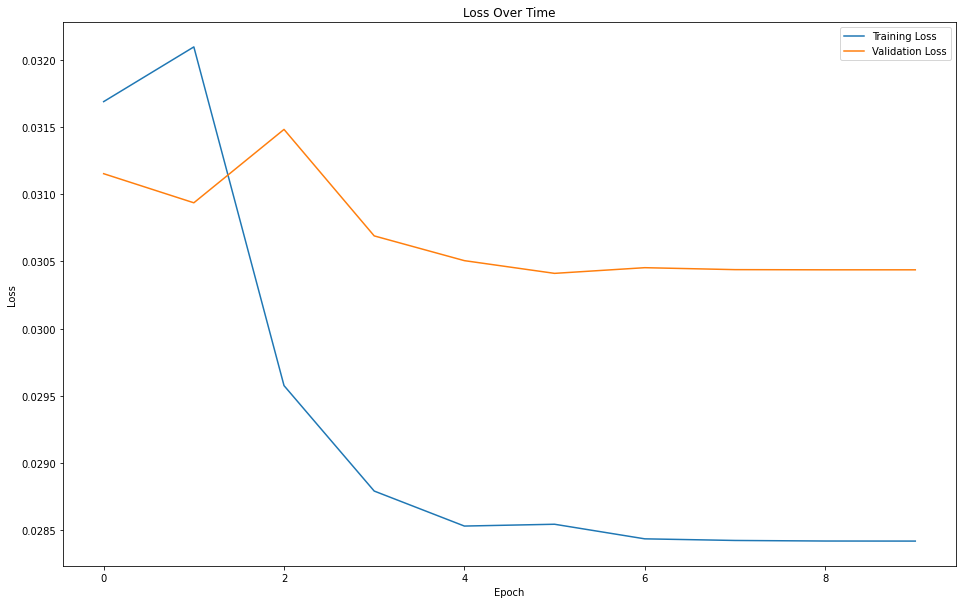

In [85]:
plt.figure(figsize=(16, 10))

epochs_range = range(epochs)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(
    epochs_range,
    train_loss,
    label="Training Loss"
)

plt.plot(
    epochs_range,
    val_loss,
    label="Validation Loss"
)

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()
plt.title("Loss Over Time")

plt.show()

In [86]:
pOneHot = model.predict(test_df)   # probabilities for each category. Subjects are rows
YLab = [f'{i}/{s}' for i, s in enumerate('walking walking_upstairs walking_downstairs sitting standing laying'.split())]  # column labels
pd.DataFrame(pOneHot[:3,:], columns=YLab).style.background_gradient(cmap='coolwarm', axis=1)  # display first few predictions

,0/walking,1/walking_upstairs,2/walking_downstairs,3/sitting,4/standing,5/laying
0,0.999977,0.000007,0.000016,0.000000,0.000001,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2,0.000000,0.000000,0.000000,0.000004,0.000000,0.999996


In [83]:
pY = pd.DataFrame(np.argmax(pOneHot, axis = 1)+1, columns=['y'])  # predicted labels (from 1 to 6)
pY.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,2897,2898,2899,2900,2901,2902,2903,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913,2914,2915,2916,2917,2918,2919,2920,2921,2922,2923,2924,2925,2926,2927,2928,2929,2930,2931,2932,2933,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943,2944,2945,2946
y,1,6,6,2,1,6,2,6,1,5,6,3,6,5,1,5,3,2,2,2,2,3,4,2,5,1,4,5,5,5,3,3,2,3,3,2,5,5,6,5,3,5,6,5,6,1,2,1,6,3,...,2,5,4,5,2,3,2,6,1,5,1,5,2,3,4,5,2,2,1,3,1,5,5,2,6,3,6,6,6,3,6,5,3,5,1,4,1,3,6,6,2,1,3,2,4,5,6,3,4,2


In [45]:
ToCSV(pY, 'HAR_baseline')  # generate a CSV submission file for Kaggle

In [87]:
from google.colab import files
files.download('HAR_baseline.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>